<a href="https://colab.research.google.com/github/hfontoh/AIML/blob/main/Fundraising.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [4]:
# Mount google drive

from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [5]:
!pip3 install pyreadr

In [6]:
#Import the necessary libraries

import numpy as np 
import pandas as pd 
import seaborn as sns
import matplotlib.pyplot as plt 
from statsmodels.stats.outliers_influence import variance_inflation_factor
import pyreadr

from sklearn.preprocessing import LabelEncoder

/usr/local/lib/python3.7/dist-packages/statsmodels/tools/_testing.py:19: FutureWarning: pandas.util.testing is deprecated. Use the functions in the public API at pandas.testing instead.
  import pandas.util.testing as tm


In [37]:
#  Load dataset

url= '/content/drive/MyDrive/Capstone2/fundraising.rds'
result = pyreadr.read_r(url) 

df = result[None]
df.head()

,zipconvert2,zipconvert3,zipconvert4,zipconvert5,homeowner,num_child,income,female,wealth,home_value,med_fam_inc,avg_fam_inc,pct_lt15k,num_prom,lifetime_gifts,largest_gift,last_gift,months_since_donate,time_lag,avg_gift,target
0,Yes,No,No,No,Yes,1.0,1.0,No,7.0,698.0,422.0,463.0,4.0,46.0,94.0,12.0,12.0,34.0,6.0,9.400000,Donor
1,No,No,No,Yes,No,2.0,5.0,Yes,8.0,828.0,358.0,376.0,13.0,32.0,30.0,10.0,5.0,29.0,7.0,4.285714,Donor
2,No,No,No,Yes,Yes,1.0,3.0,No,4.0,1471.0,484.0,546.0,4.0,94.0,177.0,10.0,8.0,30.0,3.0,7.080000,No Donor
3,No,Yes,No,No,Yes,1.0,4.0,No,8.0,547.0,386.0,432.0,7.0,20.0,23.0,11.0,11.0,30.0,6.0,7.666667,No Donor
4,No,Yes,No,No,Yes,1.0,4.0,Yes,8.0,482.0,242.0,275.0,28.0,38.0,73.0,10.0,10.0,31.0,3.0,7.300000,Donor


**Exploratory Data Analysis**

In [38]:
# check data types numeric categorical variables
# check null / missing values
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3000 entries, 0 to 2999
Data columns (total 21 columns):
 #   Column               Non-Null Count  Dtype   
---  ------               --------------  -----   
 0   zipconvert2          3000 non-null   category
 1   zipconvert3          3000 non-null   category
 2   zipconvert4          3000 non-null   category
 3   zipconvert5          3000 non-null   category
 4   homeowner            3000 non-null   category
 5   num_child            3000 non-null   float64 
 6   income               3000 non-null   float64 
 7   female               3000 non-null   category
 8   wealth               3000 non-null   float64 
 9   home_value           3000 non-null   float64 
 10  med_fam_inc          3000 non-null   float64 
 11  avg_fam_inc          3000 non-null   float64 
 12  pct_lt15k            3000 non-null   float64 
 13  num_prom             3000 non-null   float64 
 14  lifetime_gifts       3000 non-null   float64 
 15  largest_gift         

In [39]:
df.describe().T

,count,mean,std,min,25%,50%,75%,max
num_child,3000.0,1.069333,0.345301,1.000000,1.000000,1.0,1.00,5.000000
income,3000.0,3.899000,1.639419,1.000000,3.000000,4.0,5.00,7.000000
wealth,3000.0,6.395667,2.546752,0.000000,5.000000,8.0,8.00,9.000000
home_value,3000.0,1143.268000,952.145720,0.000000,554.750000,816.5,1341.25,5945.000000
med_fam_inc,3000.0,388.356333,173.732844,0.000000,278.000000,355.0,465.00,1500.000000
avg_fam_inc,3000.0,432.310333,168.903446,0.000000,318.000000,396.0,516.00,1331.000000
pct_lt15k,3000.0,14.710333,12.109637,0.000000,5.000000,12.0,21.00,90.000000
num_prom,3000.0,49.139000,22.779640,11.000000,29.000000,48.0,65.00,157.000000
lifetime_gifts,3000.0,110.740517,149.380144,15.000000,45.000000,81.0,135.00,5674.900000
largest_gift,3000.0,16.645863,22.517663,5.000000,10.000000,15.0,20.00,1000.000000


In [40]:
df.columns

Index(['zipconvert2', 'zipconvert3', 'zipconvert4', 'zipconvert5', 'homeowner',
       'num_child', 'income', 'female', 'wealth', 'home_value', 'med_fam_inc',
       'avg_fam_inc', 'pct_lt15k', 'num_prom', 'lifetime_gifts',
       'largest_gift', 'last_gift', 'months_since_donate', 'time_lag',
       'avg_gift', 'target'],
      dtype='object')

In [42]:
# convert categorical variables  to numeric
#in this case they are binary 0 or 1
# use scikit-learn LabelEncoder

le = LabelEncoder()
df['zipconvert2'] = le.fit_transform(df['zipconvert2'])
df['zipconvert3'] = le.fit_transform(df['zipconvert3'])
df['zipconvert4'] = le.fit_transform(df['zipconvert4'])
df['zipconvert5'] = le.fit_transform(df['zipconvert5'])

# 1 for YES and 0 for NO
df['homeowner'] = le.fit_transform(df['homeowner'])

# 0 for MALE and 1 for FEMALE
df['female'] = le.fit_transform(df['female'])

# 0 for Donor and 1 or Non-Donor
df['target'] =le.fit_transform(df['target'])

#check for null values
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3000 entries, 0 to 2999
Data columns (total 21 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   zipconvert2          3000 non-null   int64  
 1   zipconvert3          3000 non-null   int64  
 2   zipconvert4          3000 non-null   int64  
 3   zipconvert5          3000 non-null   int64  
 4   homeowner            3000 non-null   int64  
 5   num_child            3000 non-null   float64
 6   income               3000 non-null   float64
 7   female               3000 non-null   int64  
 8   wealth               3000 non-null   float64
 9   home_value           3000 non-null   float64
 10  med_fam_inc          3000 non-null   float64
 11  avg_fam_inc          3000 non-null   float64
 12  pct_lt15k            3000 non-null   float64
 13  num_prom             3000 non-null   float64
 14  lifetime_gifts       3000 non-null   float64
 15  largest_gift         3000 non-null   f

In [43]:
df.head()

,zipconvert2,zipconvert3,zipconvert4,zipconvert5,homeowner,num_child,income,female,wealth,home_value,med_fam_inc,avg_fam_inc,pct_lt15k,num_prom,lifetime_gifts,largest_gift,last_gift,months_since_donate,time_lag,avg_gift,target
0,1,0,0,0,1,1.0,1.0,0,7.0,698.0,422.0,463.0,4.0,46.0,94.0,12.0,12.0,34.0,6.0,9.400000,0
1,0,0,0,1,0,2.0,5.0,1,8.0,828.0,358.0,376.0,13.0,32.0,30.0,10.0,5.0,29.0,7.0,4.285714,0
2,0,0,0,1,1,1.0,3.0,0,4.0,1471.0,484.0,546.0,4.0,94.0,177.0,10.0,8.0,30.0,3.0,7.080000,1
3,0,1,0,0,1,1.0,4.0,0,8.0,547.0,386.0,432.0,7.0,20.0,23.0,11.0,11.0,30.0,6.0,7.666667,1
4,0,1,0,0,1,1.0,4.0,1,8.0,482.0,242.0,275.0,28.0,38.0,73.0,10.0,10.0,31.0,3.0,7.300000,0


A correlation plot can be used to identify the correlation or bivariate relationship between two independent variables .

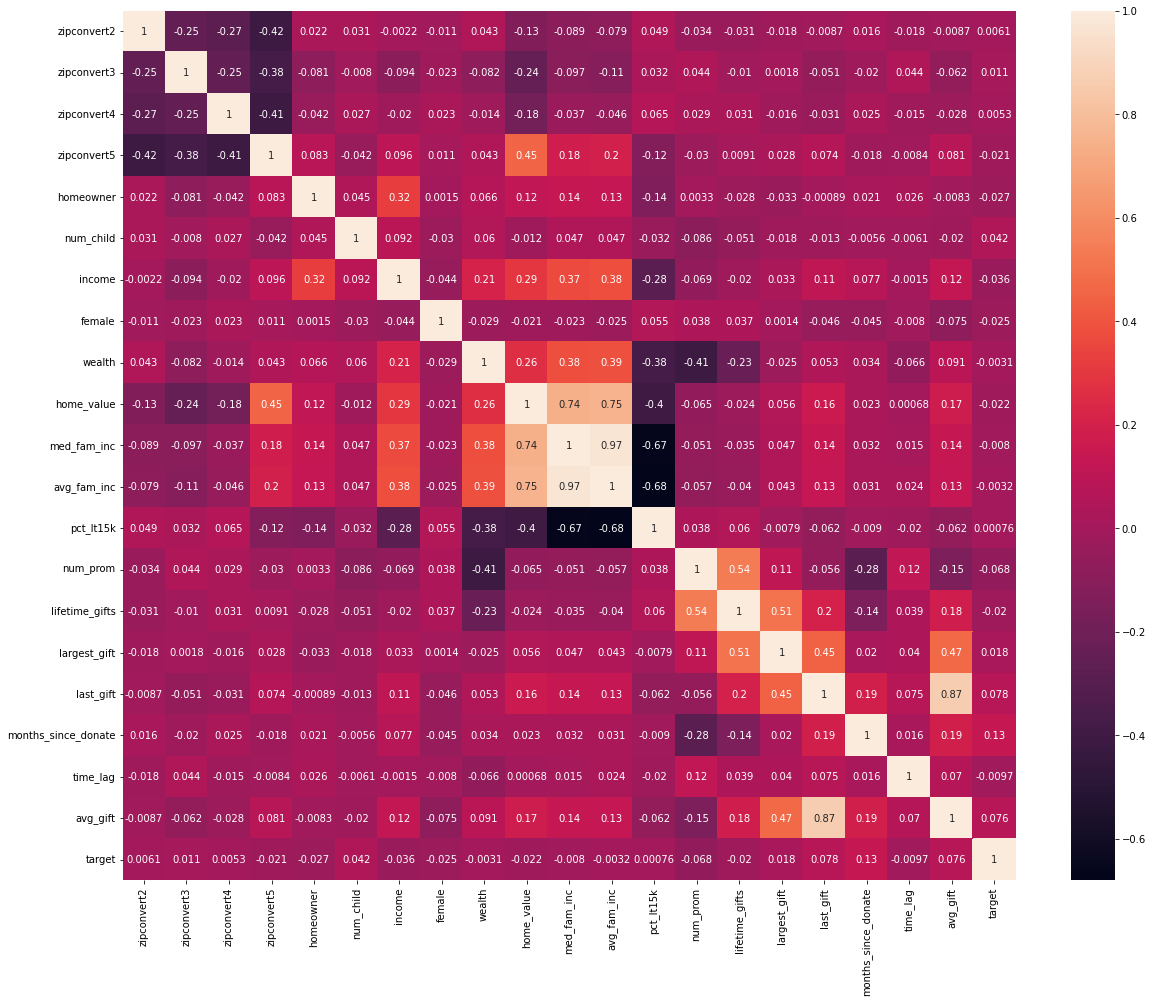

In [44]:
plt.figure(figsize = (20,16))

sns.heatmap(df.corr(),annot=True)
plt.show()

VIF is used to identify the correlation of one independent variable with a group of other variables. 

VIF = 1 → No correlation

VIF = 1 to 5 → Moderate correlation

VIF >10 → High correlation

In [51]:
def vif_scores(df):
    VIF_Scores = pd.DataFrame()
    VIF_Scores["Independent Features"] = df.columns
    VIF_Scores["VIF Scores"] = [variance_inflation_factor(df.values,i) for i in range(df.shape[1])]
    return VIF_Scores

    

In [52]:
df1 = df.iloc[:,:-1]
vif_scores(df1)

,Independent Features,VIF Scores
0,zipconvert2,28.910074
1,zipconvert3,24.199011
2,zipconvert4,29.156686
3,zipconvert5,49.157952
4,homeowner,4.946832
5,num_child,10.755255
6,income,8.722116
7,female,2.609923
8,wealth,10.951095
9,home_value,8.081189


In [61]:
df2=df.drop(['zipconvert2', 'zipconvert3', 'zipconvert4', 'zipconvert5', 'med_fam_inc',
       'avg_fam_inc','months_since_donate',
       'avg_gift', 'target'], axis=1)
vif_scores(df2)

,Independent Features,VIF Scores
0,homeowner,4.782193
1,num_child,8.718920
2,income,8.018346
3,female,2.505773
4,wealth,7.050194
5,home_value,3.078264
6,pct_lt15k,2.559385
7,num_prom,7.008296
8,lifetime_gifts,3.014443
9,largest_gift,2.559880


These are the variables  we  will consider as our predictor variables :
['homeowner', 'num_child', 'income', 'female', 'wealth', 'home_value',
       'pct_lt15k', 'num_prom', 'lifetime_gifts', 'largest_gift', 'last_gift',
       'time_lag'].  
       
They have a vif score of less than 10.


 **Split into Labels/ and  Training/Test sets**

In [63]:
#labels and target
X = df.drop('target', axis=1)
y= df['target']

from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2)

**Features Scaling**

In [69]:
from sklearn.preprocessing import StandardScaler

sc = StandardScaler()
X_train = sc.fit_transform(X_train)
X_test = sc.transform(X_test)

**LOGISTIC REGRESSION**

In [78]:
from sklearn.linear_model import LogisticRegression
model = LogisticRegression()

#Train the model and create predictions
model.fit(X_train, y_train)
y_pred = model.predict(X_test)

In [79]:
#Calculate performance metrics

from sklearn.metrics import classification_report
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.56      0.57      0.56       299
           1       0.56      0.55      0.55       301

    accuracy                           0.56       600
   macro avg       0.56      0.56      0.56       600
weighted avg       0.56      0.56      0.56       600



In [80]:
#Generate a confusion matrix
from sklearn.metrics import confusion_matrix
print(confusion_matrix(y_test,y_pred))

[[170 129]
 [136 165]]


**RANDOM FOREST CLASSIFICATION**

In [81]:
from sklearn.ensemble import RandomForestClassifier

clf = RandomForestClassifier(n_estimators=20, random_state=0)
clf.fit(X_train, y_train)
y_pred = clf.predict(X_test)

In [82]:
from sklearn.metrics import classification_report, confusion_matrix, accuracy_score

print(confusion_matrix(y_test,y_pred))
print(classification_report(y_test,y_pred))
print(accuracy_score(y_test, y_pred))

[[187 112]
 [170 131]]
              precision    recall  f1-score   support

           0       0.52      0.63      0.57       299
           1       0.54      0.44      0.48       301

    accuracy                           0.53       600
   macro avg       0.53      0.53      0.53       600
weighted avg       0.53      0.53      0.53       600

0.53
